In [ ]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pickle.load( open( "/content/drive/MyDrive/Colab Notebooks/data_encodings2.p", "rb" ) )
data = data.drop(columns=['patient_nbr'])
data = data.dropna()
#data = data.drop(columns=['gender'])
data.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,gender_Female,gender_Male,gender_Unknown/Invalid,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_nan,diag_1_Circulatory,diag_1_Diabetes,diag_1_Digestive,diag_1_Genitourinary,diag_1_Injury,diag_1_Missing,diag_1_Musculoskeletal,diag_1_Neoplasms,diag_1_Other,diag_1_Respiratory,diag_2_Circulatory,diag_2_Diabetes,diag_2_Digestive,diag_2_Genitourinary,diag_2_Injury,diag_2_Missing,diag_2_Musculoskeletal,diag_2_Neoplasms,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Missing,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Other,diag_3_Respiratory,medical_specialty_General Practice,medical_specialty_Internal Medicine,medical_specialty_Missing,medical_specialty_Others,medical_specialty_Surgery,admission_group_Elective,admission_group_Emergency,admission_group_Newborn,admission_group_Unavailable,discharge_disposition_id_grouped_AMA_StillCare,discharge_disposition_id_grouped_EndOfLife,discharge_disposition_id_grouped_HomeDischarge,discharge_disposition_id_grouped_HomeWFollowUp,discharge_disposition_id_grouped_InstitutionalCare,discharge_disposition_id_grouped_Unknown,admission_source_grouped_Births,admission_source_grouped_Data_Issues,admission_source_grouped_Emergency_or_Law,admission_source_grouped_Referrals,admission_source_grouped_Transfers,payer_code_labeled
1,15,3.0,59.0,0,18.0,0.0,0.0,0.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,17
2,25,2.0,11.0,5,13.0,2.0,0.0,1.0,6.0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,17
3,35,2.0,44.0,1,16.0,0.0,0.0,0.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,17
4,45,1.0,51.0,0,8.0,0.0,0.0,0.0,5.0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,17
5,55,3.0,31.0,6,16.0,0.0,0.0,0.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,17


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
data.dtypes

age                                            int64
time_in_hospital                             float64
num_lab_procedures                           float64
num_procedures                                 int64
num_medications                              float64
                                              ...   
admission_source_grouped_Data_Issues           int64
admission_source_grouped_Emergency_or_Law      int64
admission_source_grouped_Referrals             int64
admission_source_grouped_Transfers             int64
payer_code_labeled                             int64
Length: 95, dtype: object

# Clustering

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

## Correlation matrix

In [ ]:
correlation_matrix = data.corr()

### in text

In [ ]:
numerical_data = data.select_dtypes(include='number')
correlation_matrix_numerical = numerical_data.corr()
for column in correlation_matrix_numerical.columns:
    for index, value in correlation_matrix_numerical[column].items():
        # Überprüfe, ob der Wert größer als 0.3 und ob es sich nicht um die Diagonale handelt
        if abs(value) > 0.3 and column != index:
            print(f"{column}, {index}: {value:.2f}")

time_in_hospital, num_lab_procedures: 0.31
time_in_hospital, num_medications: 0.44
num_lab_procedures, time_in_hospital: 0.31
num_procedures, num_medications: 0.32
num_medications, time_in_hospital: 0.44
num_medications, num_procedures: 0.32
max_glu_serum, admission_group_Unavailable: 0.48
max_glu_serum, admission_source_grouped_Data_Issues: 0.53
metformin, change: 0.33
insulin, change: 0.45
insulin, diabetesMed: 0.52
change, metformin: 0.33
change, insulin: 0.45
change, diabetesMed: 0.50
diabetesMed, insulin: 0.52
diabetesMed, change: 0.50
gender_Female, gender_Male: -1.00
gender_Male, gender_Female: -1.00
race_AfricanAmerican, race_Caucasian: -0.83
race_Caucasian, race_AfricanAmerican: -0.83
diag_1_Circulatory, diag_1_Other: -0.30
diag_1_Musculoskeletal, medical_specialty_Surgery: 0.33
diag_1_Other, diag_1_Circulatory: -0.30
diag_2_Circulatory, diag_2_Other: -0.40
diag_2_Other, diag_2_Circulatory: -0.40
diag_3_Circulatory, diag_3_Other: -0.41
diag_3_Other, diag_3_Circulatory: -0.41
m

###Top 10 correlations

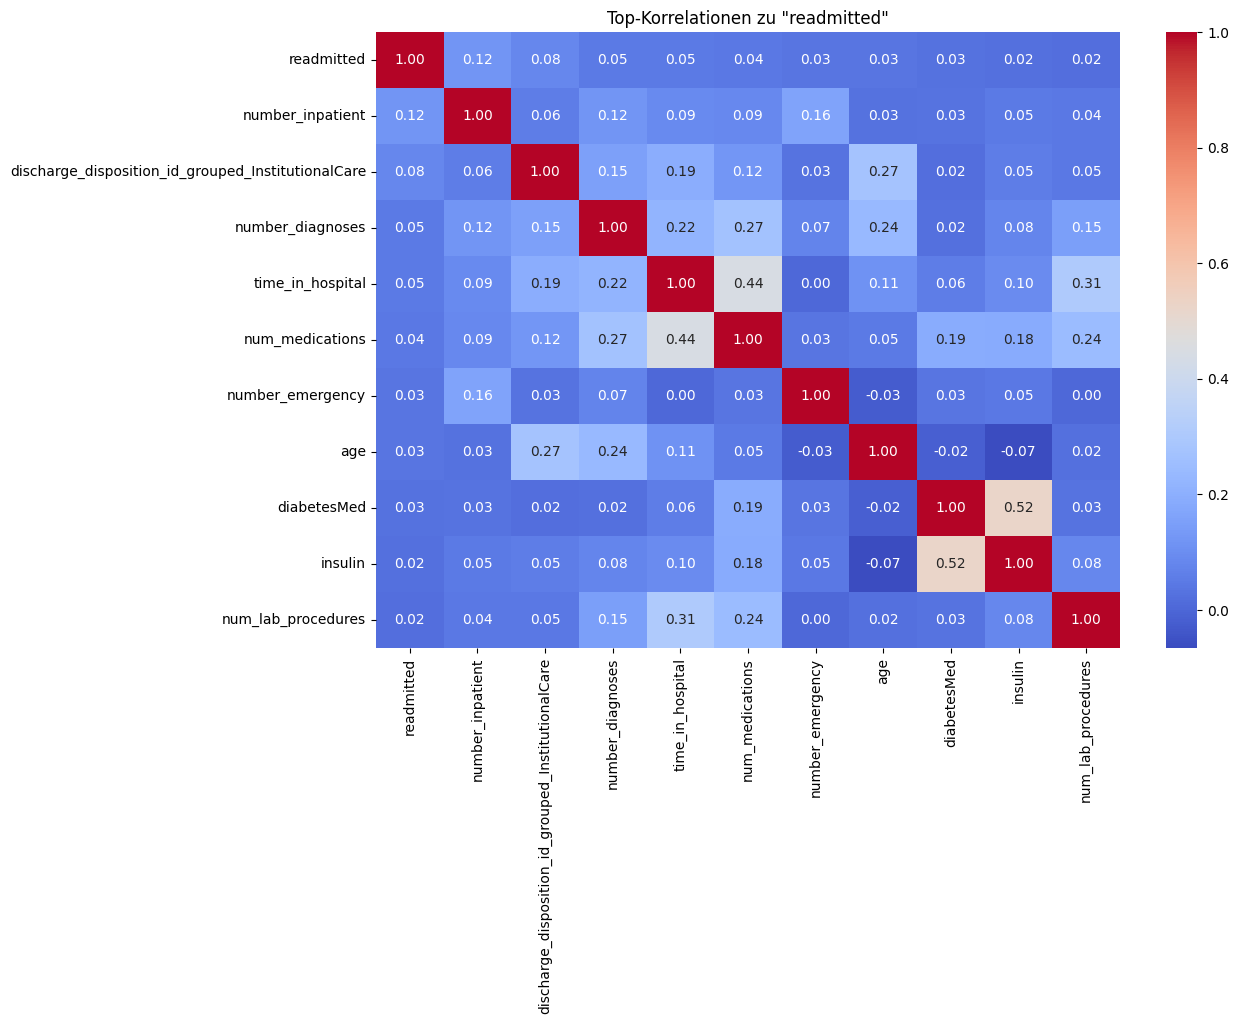

In [ ]:
#Korrelationen mit der Zielgröße sortieren
correlation_with_target = correlation_matrix['readmitted'].sort_values(ascending=False)

#Die Top-N-Korrelationen anzeigen (zum Beispiel die Top 10)
top_correlation_features = correlation_with_target.head(11)  # 10 Features + Zielgröße

#Heatmap nur für die Top-Korrelationen
plt.figure(figsize=(12, 8))
sns.heatmap(data[top_correlation_features.index].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top-Korrelationen zu "readmitted"')
plt.show()

### Subsample
Because the dataset is so large, it was difficult to visualize clusterings. This is why we decided to take a subsample to better visualize the result.

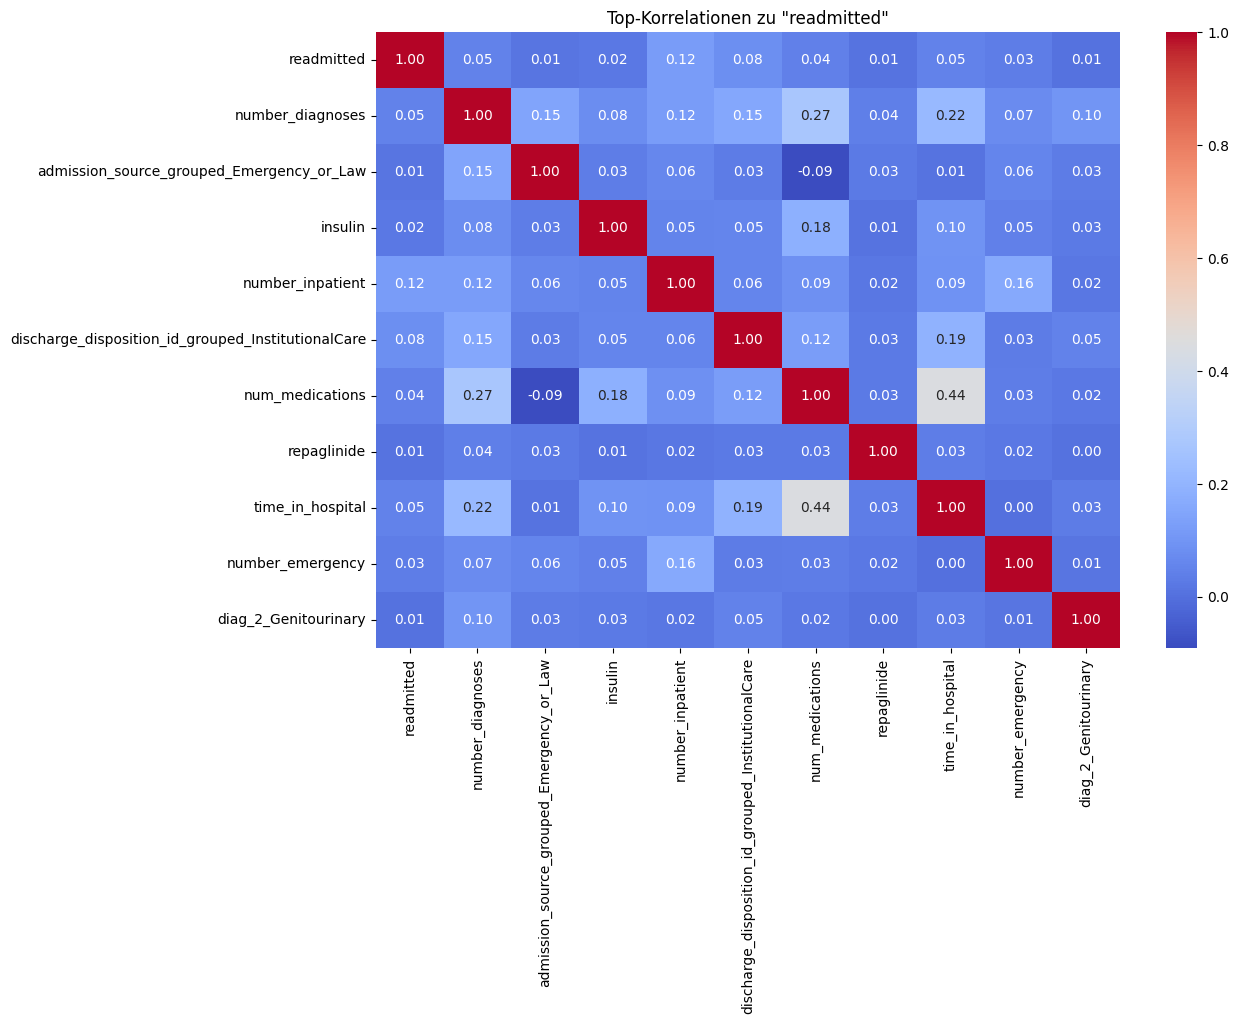

In [ ]:
subset_data = data.sample(n=300, random_state=42)
correlation_matrix_sub = subset_data.corr()
#Korrelationen mit der Zielgröße sortieren
correlation_with_target = correlation_matrix_sub['readmitted'].sort_values(ascending=False)

#Die Top-N-Korrelationen anzeigen (zum Beispiel die Top 10)
top_correlation_features = correlation_with_target.head(11)  # 10 Features + Zielgröße

#Heatmap nur für die Top-Korrelationen
plt.figure(figsize=(12, 8))
sns.heatmap(data[top_correlation_features.index].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top-Korrelationen zu "readmitted"')
plt.show()

## Quantifying information content of features

In [ ]:
import numpy as np
all_cols = data.columns
cont_data = ["time_in_hospital", "num_lab_procedures", "num_procedures", "num_medications", "number_outpatient", "number_emergency", "number_inpatient", "number_diagnoses"]
cat_data = [col for col in all_cols if col not in cont_data]

### Entropy

In [ ]:
#Entropie für kategorische Daten
from scipy.stats import entropy
cat_feature_entropies=[]
for feature in cat_data:
    x=entropy(data[feature].value_counts(), base=2)/(len(data[feature].value_counts().index)-1)
    cat_feature_entropies.append(x)
    print(feature+' '+str(x))
cat_feature_entropies=np.array(cat_feature_entropies)



age 0.2930104795473134
max_glu_serum 0.12465723214530261
A1Cresult 0.30052195811792654
metformin 0.27204808475716874
repaglinide 0.040360774126714745
nateglinide 0.020737213725267174
chlorpropamide 0.0034431870912686115
glimepiride 0.10692075047202244
acetohexamide nan
glipizide 0.20540419628982243
glyburide 0.18644312274589703
tolbutamide 0.0032705556847689634
pioglitazone 0.13194694055694092
rosiglitazone 0.11919056570930515
acarbose 0.00969171320895027
miglitol 0.001726248449743868
troglitazone 0.0005198159220655335
tolazamide 0.0025914847247060758
insulin 0.5770996599841879
glyburide-metformin 0.020526646479502822
glipizide-metformin 0.0019617317811937767
glimepiride-pioglitazone 0.0001900312790642066
metformin-rosiglitazone 0.0001900312790642066
metformin-pioglitazone 0.0001900312790642066
change 0.9937865512659362
diabetesMed 0.7856768054353053
readmitted 0.4852304754959464
gender_Female 0.9959316984423272
gender_Male 0.9959248120699451
gender_Unknown/Invalid 0.000519815922065533

<ipython-input-646-f7a26236bae9>:5: RuntimeWarning: invalid value encountered in scalar divide
  x=entropy(data[feature].value_counts(), base=2)/(len(data[feature].value_counts().index)-1)


diag_3_Respiratory 0.3706367424392561
medical_specialty_General Practice 0.38066111700667726
medical_specialty_Internal Medicine 0.6661151616534393
medical_specialty_Missing 0.9996170314559595
medical_specialty_Others 0.6977434295198551
medical_specialty_Surgery 0.3864550506005146
admission_group_Elective 0.6885581777672124
admission_group_Emergency 0.8637228780214089
admission_group_Newborn 0.001549050089417593
admission_group_Unavailable 0.4757863200344382
discharge_disposition_id_grouped_AMA_StillCare 0.05123765445961242
discharge_disposition_id_grouped_EndOfLife 0.16063843779103915
discharge_disposition_id_grouped_HomeDischarge 0.971698980605124
discharge_disposition_id_grouped_HomeWFollowUp 0.536138269621596
discharge_disposition_id_grouped_InstitutionalCare 0.7024465805022215
discharge_disposition_id_grouped_Unknown 0.3196140894657031
admission_source_grouped_Births 0.0008273962732355161
admission_source_grouped_Data_Issues 0.3627942272280275
admission_source_grouped_Emergency_or

### Standard deviation

In [ ]:
# Standardabweichung für kontinuierliche Daten
cont_feature_spread=[]
for feature in cont_data:
    standardardized=(data[feature]-data[feature].mean())/data[feature].std()
    x=abs(standardardized.max()-standardardized.min())
    cont_feature_spread.append(x)
    print(feature+'  '+str(x))
cont_feature_spread=np.array(cont_feature_spread)

time_in_hospital  4.28507836138566
num_lab_procedures  5.169022885522905
num_procedures  3.596915337069553
num_medications  5.467446038983157
number_outpatient  5.666520553885777
number_emergency  5.4486982971652305
number_inpatient  4.5757186303027435
number_diagnoses  5.739421681188254


## Clustering algorithms

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

In [ ]:
data.shape


(94573, 95)

### reducing dimensions due to high dimensional data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Annahme: data ist dein DataFrame mit den vorbereiteten Daten
# Standardisierung der Daten
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(subset_data)

### PCA

In [ ]:
from sklearn.decomposition import PCA

# Durchführung der PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)





PCA(n_components=2)

### K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


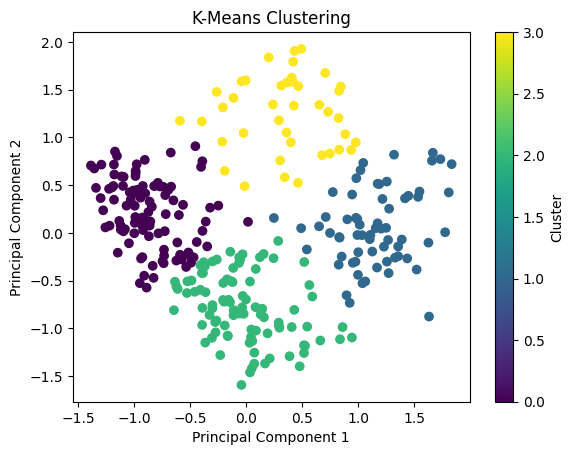

In [ ]:
from sklearn.cluster import KMeans

# Annahme: pca ist das PCA-Modell, das bereits auf scaled_data angepasst wurde

# Transformiere die skalierten Daten mit der PCA
transformed_data = pca.transform(scaled_data)

# Anzahl der Cluster festlegen
num_clusters = 4

# K-Means-Modell erstellen und anpassen
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(transformed_data)

# Clusterzugehörigkeit für jeden Datenpunkt erhalten
cluster_labels = kmeans.labels_

# Darstellung der Cluster
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()


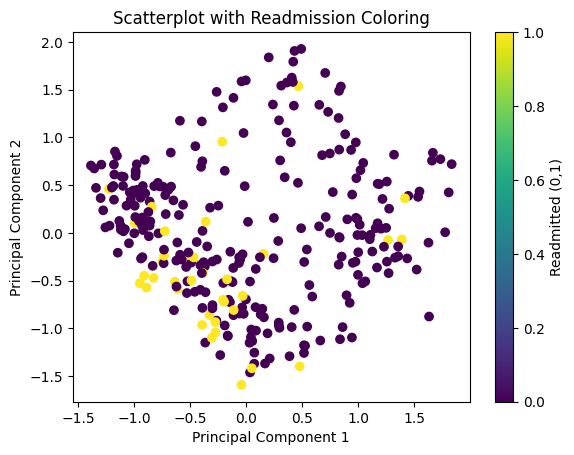

In [ ]:
readmitted = subset_data['readmitted'].values

# Darstellung der Datenpunkte mit Farben basierend auf der Zielvariable 'readmitted'
scatter = plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=readmitted, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatterplot with Readmission Coloring')

# Hinzufügen einer Farbkarte
plt.colorbar(scatter, label='Readmitted (0,1)')
plt.show()

### DBSCAN Clustering

###DBScan

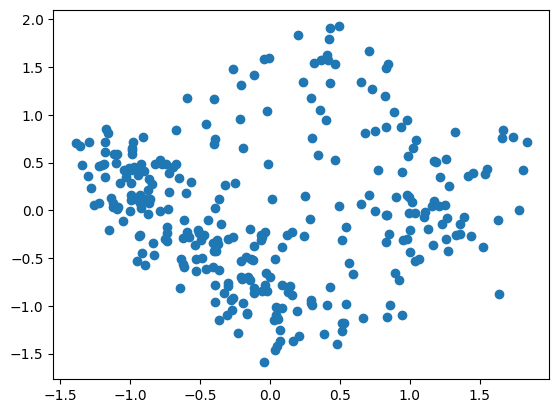

In [ ]:
from sklearn.cluster import DBSCAN

# Annahme: pca ist das PCA-Modell, das bereits auf scaled_data angepasst wurde

# Transformiere die skalierten Daten mit der PCA
transformed_data = pca.transform(scaled_data)
dbsc = pd.DataFrame(transformed_data, columns=['PCA1','PCA2'])
dbsc.head(10)
plt.scatter(dbsc['PCA1'],dbsc['PCA2'])

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(dbsc)
#The silhouette
#score gives the average value for all the samples.
#This gives a perspective into the density and separation of the formed
#clusters
  silhouette_avg = silhouette_score(dbsc, cluster_labels)
  print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
#Compute the siLhouette scores for each sample
  sample_silhouette_values = silhouette_samples (dbsc, cluster_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.44301895982114653
For n_clusters = 3 The average silhouette_score is : 0.45226452447652427
For n_clusters = 4 The average silhouette_score is : 0.48897374753148065


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.4556180064167172


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.43226098585135825


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.4316443152470765


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.4223463863069463


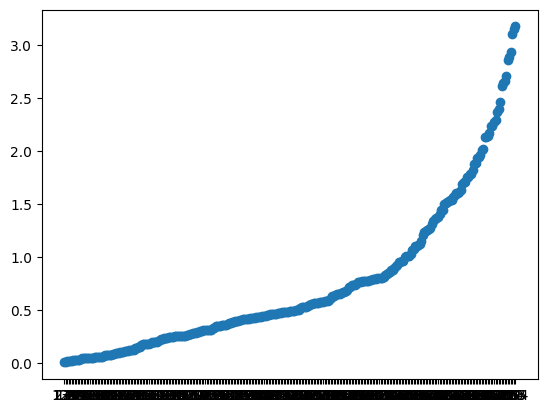

Considering mindistance between 0.1 to 0.5


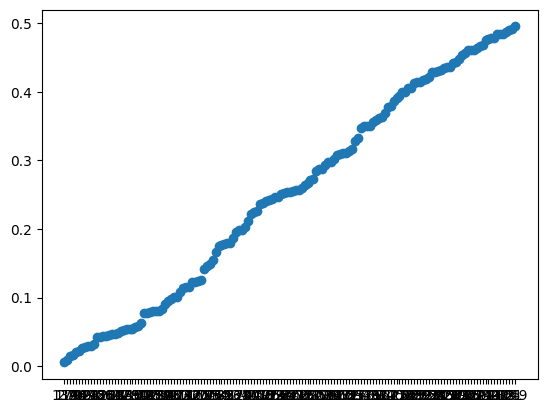

In [ ]:
dbsc = dbsc.sort_values(by=['PCA1', 'PCA2'])
df2 = pd.DataFrame(columns = ['index', 'distance'])
for i in range(0, len(dbsc)-1) :
  dist = np.linalg.norm(dbsc.iloc[i]-dbsc.iloc[i+1])
  df2.loc[len(df2)] = {'index': str(i), 'distance': dist}

df2 = df2.sort_values(by=[ 'distance' ])
plt.scatter(df2['index'], df2['distance'])
plt. show()
print("Considering mindistance between 0.1 to 0.5")
df3 = df2[df2['distance'] < 0.5]
df3 = df3. sort_values (by=['distance'])
plt.scatter(df3['index'], df3['distance'])
plt. show()


In [ ]:
range_eps = [0.1, 0.2, 0.3, 0.4, 0.5]
for i in range_eps:
  print("eps value is "+str(i))
  db = DBSCAN(eps=i, min_samples=5).fit(dbsc)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  print(set (labels) )
  silhouette_avg = silhouette_score(dbsc, labels)
  print("For eps value ="+str(i), labels, "The average silhouette_score is :", silhouette_avg)

eps value is 0.1
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1}
For eps value =0.1 [-1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0 -1  1  0 -1
  0  1 -1  1  1  1  0  1  2  1  2 -1 -1 -1 -1  1  2 -1  1 -1  2  2  1 -1
  1  2 -1 -1  1  2 -1  2  2  1  2  2 -1 -1 -1  3  3 -1  3 -1  3 -1 -1 -1
 -1  3 -1  3 -1  3 -1 -1 -1  4 -1 -1 -1 -1  4 -1  4  4 -1  4 -1 -1  4  4
  4 -1  4 -1 -1 -1 -1  4 -1  4 -1 -1 -1  5 -1  4  4  4 -1 -1 -1 -1  5 -1
 -1  5  4 -1  5 -1  5 -1 -1 -1 -1 -1 -1  6 -1  6 -1 -1 -1 -1 -1  6  6  7
 -1 -1  7 -1  6  6  7  7  6  7 -1 -1  6  7 -1 -1  6 -1 -1  6 -1  8 -1 -1
  8  8 -1  8 -1 -1  9 -1  8 -1  9  9  9 -1  9 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 10 -1 10 -1 10 -1 -1 10 -1 -1 10 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1] The average

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
#The silhouette_score gives the average value for all the samples.
#This gives a perspective into the density and separation of the formed
#clusters
min_samples = [1, 2,3,4,5,6,7,8,9, 10]
for i in min_samples :
  print("minsamples value is "+str(i))
  db = DBSCAN(eps=0.2, min_samples=i). fit(dbsc)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
##renoring the saheb. core as pte fodache out Tens
#as its for the outliers
  labels = set([label for label in db.labels_ if label >= 0])
  print(set(labels) )
  print("For min_samples value ="+str(i), "Total no. of clusters are "+ str(len(set(labels))))

minsamples value is 1
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}
For min_samples value =1 Total no. of clusters are 25
minsamples value is 2
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
For min_samples value =2 Total no. of clusters are 13
minsamples value is 3
{0, 1, 2, 3, 4, 5, 6, 7, 8}
For min_samples value =3 Total no. of clusters are 9
minsamples value is 4
{0, 1, 2, 3, 4}
For min_samples value =4 Total no. of clusters are 5
minsamples value is 5
{0, 1, 2, 3, 4, 5}
For min_samples value =5 Total no. of clusters are 6
minsamples value is 6
{0, 1, 2, 3}
For min_samples value =6 Total no. of clusters are 4
minsamples value is 7
{0, 1}
For min_samples value =7 Total no. of clusters are 2
minsamples value is 8
{0, 1, 2}
For min_samples value =8 Total no. of clusters are 3
minsamples value is 9
{0, 1}
For min_samples value =9 Total no. of clusters are 2
minsamples value is 10
{0, 1}
For min_samples value =10 Total no. of clusters are 2


In [ ]:
db = DBSCAN(eps=0.2, min_samples=6).fit(dbsc)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(set (labels) )
n_clusters = len(set(labels))
n_noise = list(labels). count (-1)
print( 'Estimated number of clusters: %d' % n_clusters)
print( 'Estimated number of noise points: %d'% n_noise)

{0, 1, 2, 3, -1}
Estimated number of clusters: 5
Estimated number of noise points: 70


Anzahl der Cluster: 4


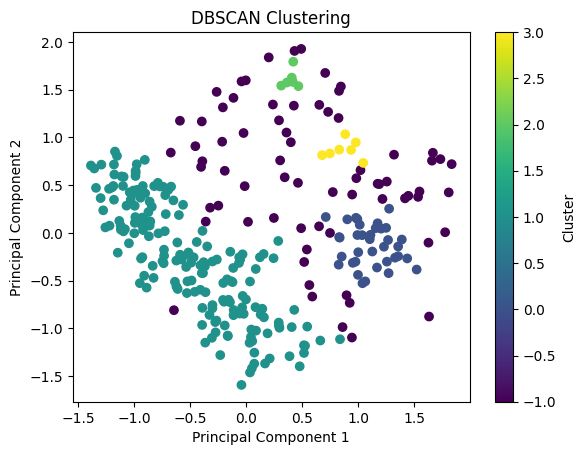

In [ ]:
dbscan = DBSCAN(eps=0.2, min_samples=6)  # Beispielwerte für eps und min_samples
cluster_labels = dbscan.fit_predict(transformed_data)

# Clusterzählen
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print("Anzahl der Cluster:", n_clusters)
# Darstellung der Cluster
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()

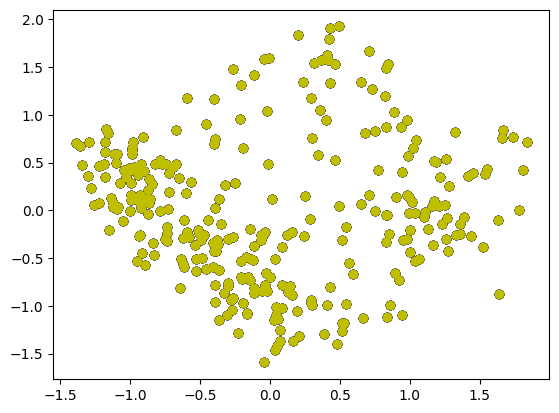

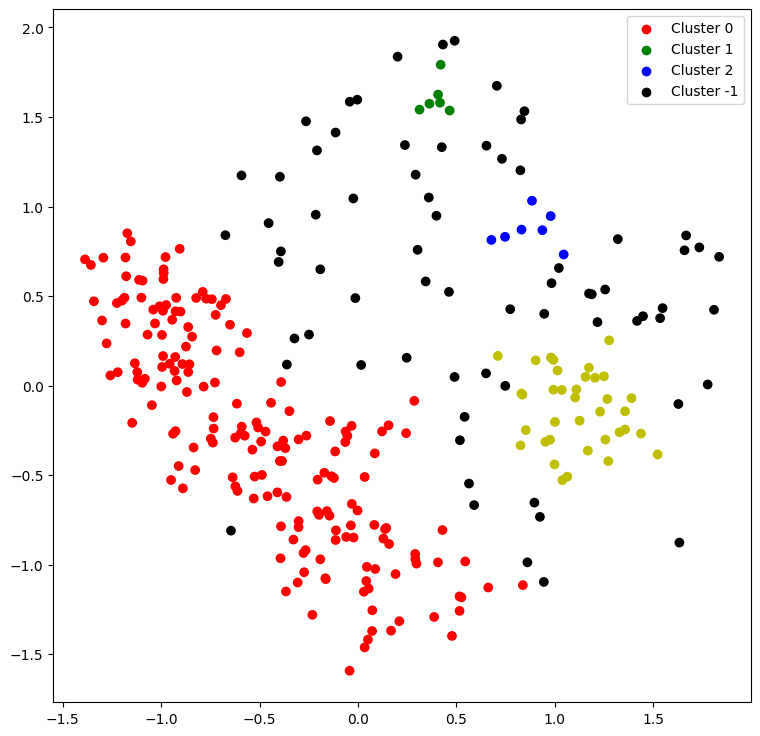

In [ ]:
colours = {}
colours [0] = 'r'
colours [1] = 'g'
colours [2] = 'b'
colours [-1] = 'k'
colours [3] = 'y'
#Building the colour vector for each data point
cvec = [colours [label] for label in labels]
#For the construction of the legend of the plot
r = plt. scatter(dbsc['PCA1'], dbsc['PCA2'], color ='r');
g = plt. scatter(dbsc['PCA1'], dbsc['PCA2'], color ='g');
b = plt. scatter(dbsc['PCA1'], dbsc['PCA2'], color ='b');
k = plt. scatter(dbsc['PCA1'], dbsc['PCA2'], color ='k');
У = plt.scatter (dbsc['PCA1'], dbsc['PCA2'], color = 'y' );
#Plotting P1 on the X-Axis and P2 on the Y-Axis
#according to the colour vector defined
plt. figure(figsize =(9, 9))
plt. scatter (dbsc['PCA1'], dbsc['PCA2'], c = cvec)
plt. legend ((r, g, b, k), ('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster -1', 'Cluster 3'))
plt.show()

## Manifold

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


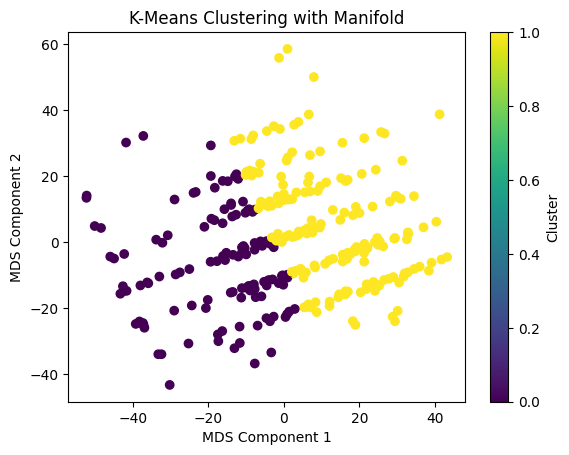

300


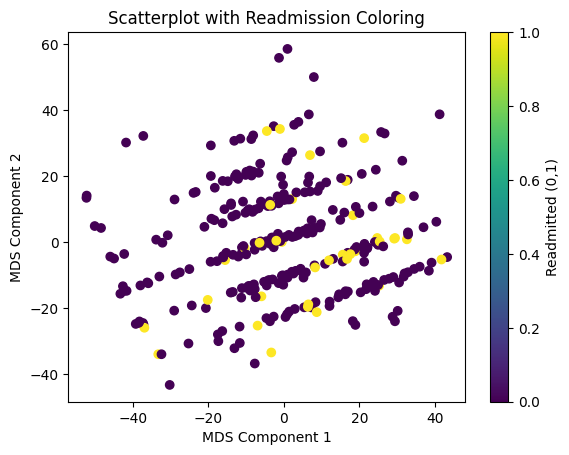

In [ ]:
"""### Manifold"""

from sklearn.manifold import MDS

# Durchführung der MDS
mds = MDS(n_components=2)
mds_transformed = mds.fit_transform(subset_data)

"""### K-means"""

from sklearn.cluster import KMeans

# Annahme: mds_transformed sind Ihre transformierten Daten mit MDS
# Anzahl der Cluster festlegen
num_clusters = 2

# K-Means-Modell erstellen und anpassen
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(mds_transformed)

# Clusterzugehörigkeit für jeden Datenpunkt erhalten
cluster_labels = kmeans.labels_

# Darstellung der Cluster
plt.scatter(mds_transformed[:, 0], mds_transformed[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.title('K-Means Clustering with Manifold')
plt.colorbar(label='Cluster')
plt.show()

readmitted = subset_data['readmitted'].values
print(len(readmitted))
# Darstellung der Datenpunkte mit Farben basierend auf der Zielvariable 'readmitted'
scatter = plt.scatter(mds_transformed[:, 0], mds_transformed[:, 1], c=readmitted, cmap='viridis')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.title('Scatterplot with Readmission Coloring')

# Hinzufügen einer Farbkarte
plt.colorbar(scatter, label='Readmitted (0,1)')
plt.show()


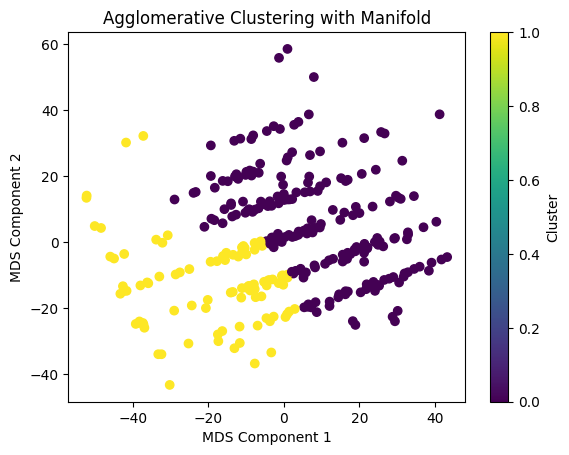

In [ ]:
"""### Agglomerative Clustering"""

from sklearn.cluster import AgglomerativeClustering

# Annahme: mds_transformed sind Ihre transformierten Daten mit MDS
# Anzahl der Cluster festlegen
num_clusters = 2

# Agglomerative Clustering erstellen und anpassen
agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
agglomerative.fit(mds_transformed)

# Clusterzugehörigkeit für jeden Datenpunkt erhalten
cluster_labels_agg = agglomerative.labels_

# Darstellung der Cluster
plt.scatter(mds_transformed[:, 0], mds_transformed[:, 1], c=cluster_labels_agg, cmap='viridis')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.title('Agglomerative Clustering with Manifold')
plt.colorbar(label='Cluster')
plt.show()
